In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data

In [4]:
data = pd.read_csv("../data/heart.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data columns:
- age
- sex
- chest pain type (from 0 to 3)
- resting blood pressure 
- serum cholesterol (mg/dl)
- fasting blood sugar (0 if < 120 mg/ml otherwise 1)
- resting ECG results (from 0 to 2)
- max heart rate 
- exercise induced angina (0 or 1)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- colored major vessels (from 0 to 3)
- thal: 3 = normal, 6 = fixed defect, 7 = reversable defect

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
if data.shape == data.dropna().shape:
    print("Empty cells are no present")

Empty cells are no present


## Features distribution

#### Distribution histograms

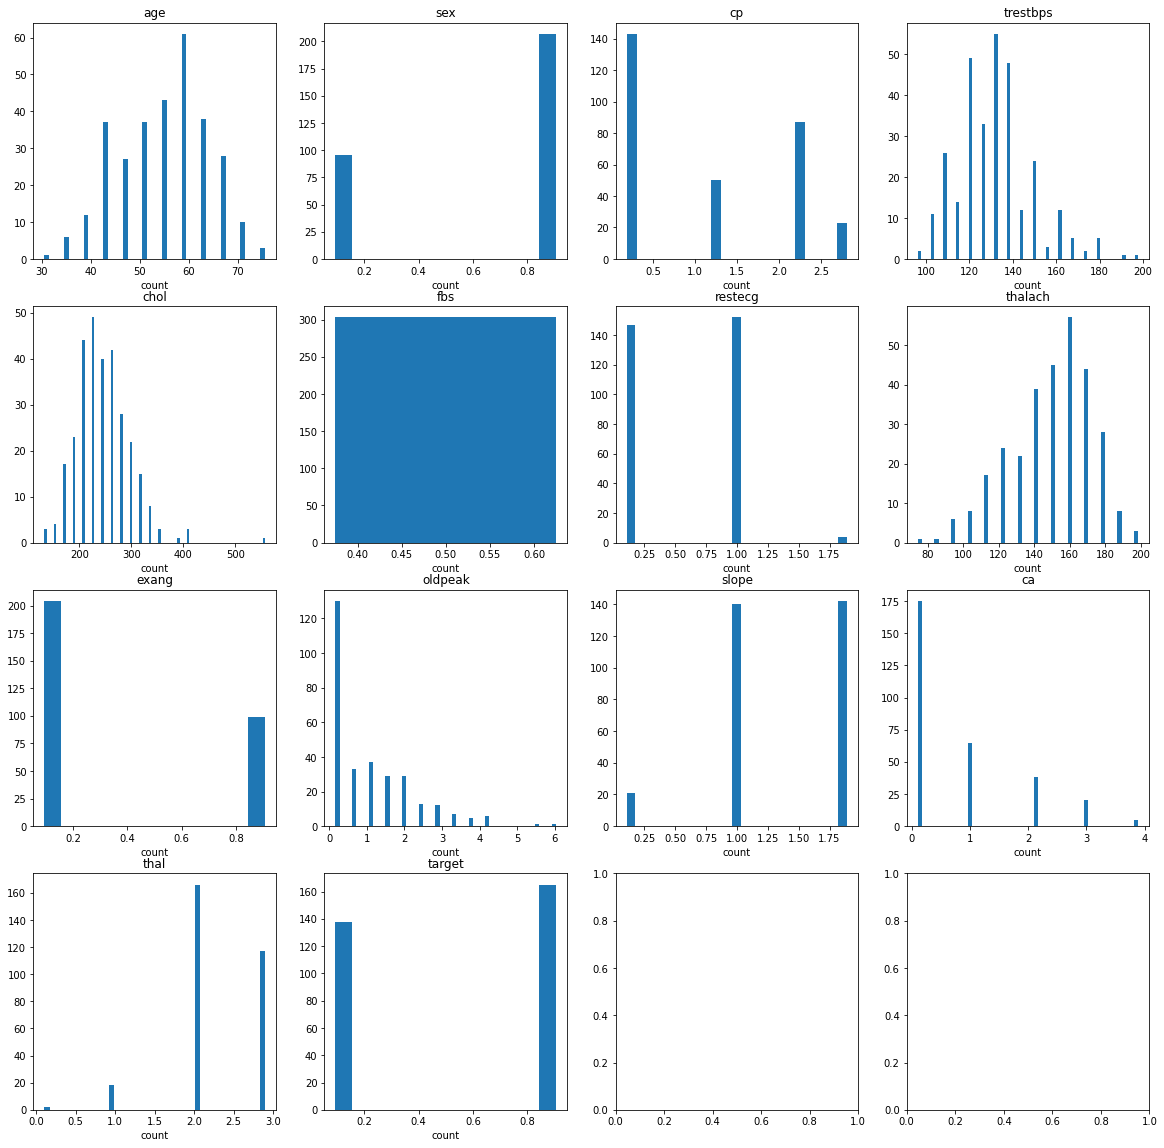

In [8]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(data.columns):
    values = data[column].tolist()
    ax = axs[i // 4][i % 4]
    bins = np.histogram_bin_edges(values, bins="fd")
    ax.hist(values, bins=bins, rwidth=0.25)
    ax.set_title(column)
    ax.set_xlabel("count")
    
plt.show()

## Feature correlations

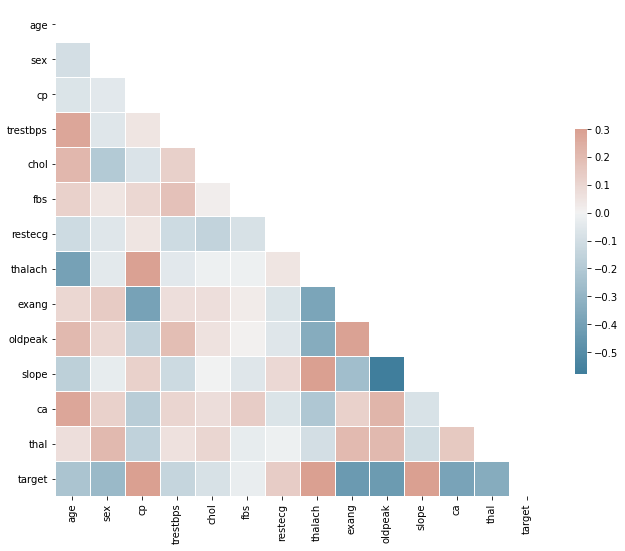

In [9]:
fig, axes = plt.subplots(figsize=(11, 9))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()